In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape

(150, 6)

In [4]:
df.size

900

In [5]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [9]:
df['Species'] = le.fit_transform(df['Species'])
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
df['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

In [11]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [12]:
sns.set_style("darkgrid")

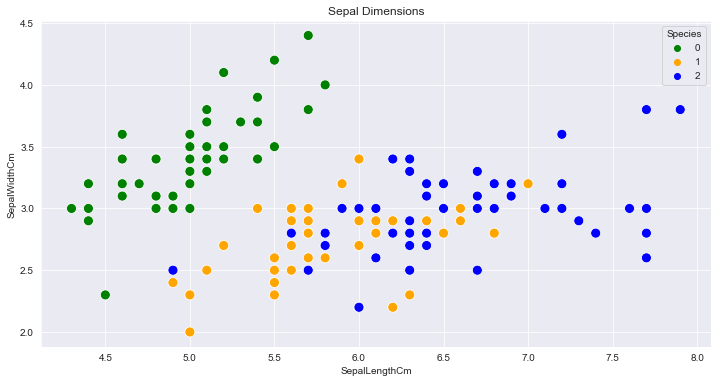

In [15]:
plt.figure(figsize=(12, 6))
plt.title('Sepal Dimensions')

sns.scatterplot(x=df["SepalLengthCm"], 
                y=df["SepalWidthCm"], 
                hue=df["Species"],palette = ["green","orange","blue"],
                s=100);

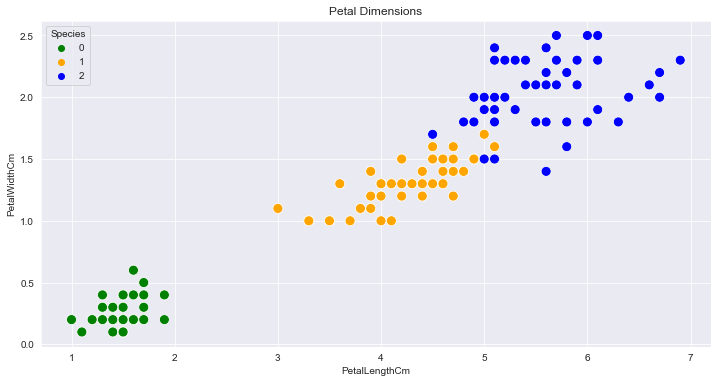

In [16]:
plt.figure(figsize=(12, 6))
plt.title('Petal Dimensions')

sns.scatterplot(x=df["PetalLengthCm"], 
                y=df["PetalWidthCm"], 
                hue=df["Species"],palette = ["green","orange","blue"],
                s=100);

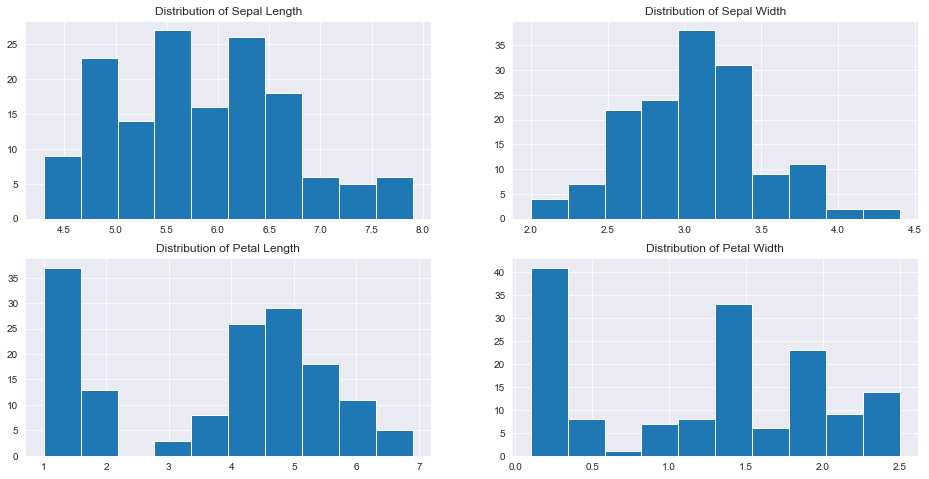

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

#plot for sepal length
axes[0,0].set_title('Distribution of Sepal Length')
axes[0,0].hist(df["SepalLengthCm"]);

#plot for sepal width
axes[0,1].set_title('Distribution of Sepal Width')
axes[0,1].hist(df["SepalWidthCm"]);

#plot for petal length
axes[1,0].set_title('Distribution of Petal Length')
axes[1,0].hist(df["PetalLengthCm"]); 

#plot for petal width
axes[1,1].set_title('Distribution of Petal Width')
axes[1,1].hist(df["PetalWidthCm"]);

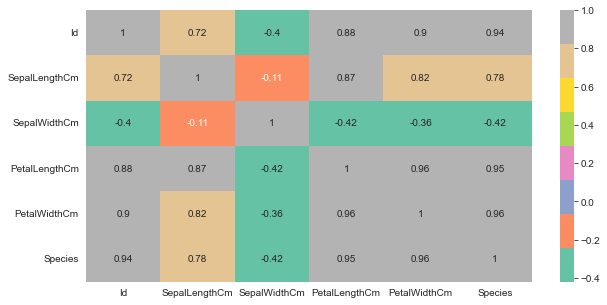

In [21]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='Set2');

In [22]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size = 0.2)

In [23]:
train.shape, test.shape

((120, 6), (30, 6))

In [25]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [26]:
train_x = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y = train.Species
test_x = test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
test_y = test.Species

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [28]:
dtree = DecisionTreeClassifier()
dtree.fit(train_x,train_y)
predictions = dtree.predict(test_x)
print("The accuracy of Decision Tree is:", metrics.accuracy_score(predictions, test_y))

The accuracy of Decision Tree is: 0.9333333333333333


In [38]:
X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = df.Species

In [39]:
dtree1 = DecisionTreeClassifier()
dtree1.fit(X,Y)
print("Decision Tree Classifier is created")

Decision Tree Classifier is created


<Figure size 432x288 with 0 Axes>

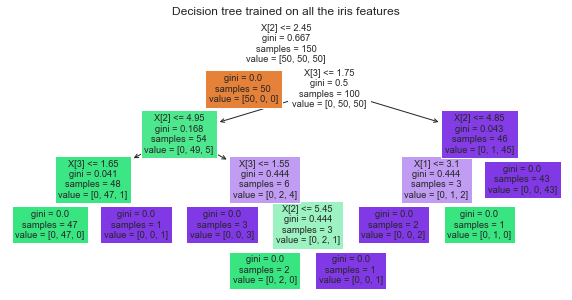

In [50]:
from sklearn.tree import plot_tree

plt.figure()
plt.figure(figsize=(10,5))
clf = DecisionTreeClassifier().fit(X, Y)
plot_tree(clf, filled=True)
plt.title("Decision tree trained on all the iris features")
plt.show()


